In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as la
import pandas as pd
import sklearn

## Task 1: Perceptron Algorithm


Implement a simple perceptron as discussed in class that takes the following three arguments as input:

1. `X`: A numpy array of the shape `(N,d)` where `N` is the number of data points, and `d` is the data dimension. Do not assume anything about `N` or `d` other than being a positive integer. `X` is the input data features in the training set.
2. `Y`: A numpy array of the shape `(N,)`, the labels set corresponding to `X`. Each entry in `Y` is either $+1$ or $-1$.
3. `num_epochs`: The number of epochs the perceptron runs

and returns the parameters $\theta$ of the perceptron after the last epoch completes where
$$\theta=\begin{bmatrix} \theta_0\\ \theta_1\\ \cdots \\ \theta_d \end{bmatrix}$$
which is a numpy array with a shape of `(d+1,1)`. Notice that $\theta$ has one more dimension than the inputs because of the constant $\theta_0$.

Recall the perceptron can be thought of as running stochastic gradient descent with the cost function for $\theta$, one input $x$, and an output $y$ given by
$$ \ell_h(\theta,x,y) = \max (0, -y\theta^\intercal x).$$
Specifically, in each epoch, we go through each sample $(x,y)$ in the training set, and update $\theta$ as
$$\theta \leftarrow \theta + yx$$
if $y\theta^\intercal x \leq 0$. 

Complete the description below of function `perceptron` to get an implementation of perceptron. The implementation below, also tracks the fraction of samples in the training set that are wrongly classfied in each epoch; this is maintained so that we can later plot to see how the error changes.

In [2]:
#grade

def perceptron(X, Y, num_epochs):
    assert X.ndim==2
    N = X.shape[0]
    d = X.shape[1]
    assert Y.size == N
    
    errors = []
    X_constant = np.concatenate([np.ones((N,1)), X], axis=1) # concatenate a column of 1's
    theta = np.zeros(X_constant.shape[1])
    for epoch in range(num_epochs):
        err = 0 #reset the error counter
        
        for i, x in enumerate(X_constant):
            guess = np.dot(x,theta) #take the dot product of the weight and the data
            guess = 1.0 if guess > 0 else -1.0 
            
            if guess != Y[i]:
                err += 1 # the classifier was wrong on the example
                
                ### WRITE YOUR CODE HERE
                theta = theta + Y[i]*x
                
                ### END STUDENT SOLUTION
        
        errors.append(err/X_constant.shape[0]) #track the error after each pass through the training set
    return theta, np.array(errors)

    

In [3]:
#SAMPLE TEST CASE
some_X = np.array([[-1,-1], [-5,-2.5], [-7.5,7.5], [10,7.5], [-2.5,12.5], [5,10], [5,5]])
some_Y = np.array([[-1], [-1], [-1], [1], [-1], [1], [1]])
num_epochs = 1
theta, errors = perceptron(some_X, some_Y, num_epochs)
assert np.array_equal(theta.round(3), np.array([0, 12.5, -5]))

## Task 2: Read and visualize digits data

We will run perceptron on a dataset that comprises of images of handwritten digits 0-9. The dataset is too large to be uploaded as a single file in PrairieLearn. So it has been split into 8 files, which is read and merged into a single np array. The training dataset has 42000 such images, represented as 28x28 bits that we use as a flattened feature vector of length 28*28=784. The data set has an additional index column. Each image has the label of the digit that it is an image of. Run the code below to read in the data and visualize a single digit. Feel free to modify the index for `samplerow` to see some other digit examples.

In [4]:
# Read data files and merge them to create one np array
train = pd.concat(map(pd.read_csv, ["train_1.csv","train_2.csv","train_3.csv","train_4.csv","train_5.csv","train_6.csv","train_7.csv","train_8.csv"]), ignore_index=True)

# Get some information about the data:
print("Training set has {0[0]} rows and {0[1]} columns".format(train.shape))

Training set has 42000 rows and 785 columns


A sample digit from the dataset:


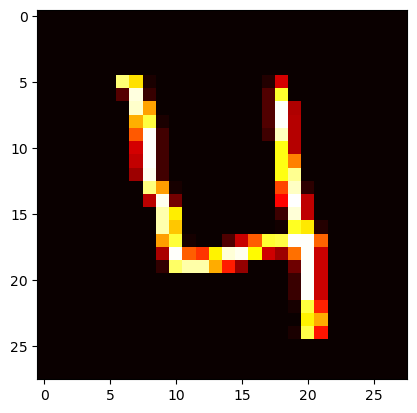

In [5]:
# Store the labels in a vector
trainlabels = train.label

# Store the data in a matrix (without labels)
traindata = np.array(train.loc[:,'pixel0':])

# Visualize a single digit (one row from the training data matrix)
samplerow = traindata[3:4] # Get one row from training data. Feel free to change the row
samplerow = np.reshape(samplerow,(28,28)) # reshape it to a 28*28 grid
print("A sample digit from the dataset:")
plt.imshow(samplerow, cmap="hot")

In [6]:
trainlabels[10]

8

## Task 3: Train Perceptron

The original dataset is for a *multiclass* classification problem: given an image, which among the 10 digits (0-9) does it correspond to? We are instead going to break this up into 10 binary classification problems: Can you train perceptron to find a classifier that separates all the images for digit $i$ from those that are not for digit $i$? The function `createLabels` creates the label vector for the binary classification problem for digit `k`. In other words, it creates a labels set Y that is +1 wherever we have the desired digit `k`, and -1 for all other digits. Complete the description of this function below.

In [7]:
#grade

def createLabels(L,k):
    # L is (N,) np array that stores the labels for multi-class classification
    
    Y = np.zeros(L.shape)
    for i in range(len(L)):
        
        ### WRITE YOUR CODE HERE
        digit = L[i]
            
        if digit == k:

            Y[i] = 1
            
        else:
            
            Y[i] = -1
        
        
        ### END STUDENT SOLUTION
    
    return Y

In [14]:
print(trainlabels)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [16]:
#SAMPLE TEST CASE
Y = createLabels(trainlabels,4)
assert Y[3] == 1.0 and Y[4] == -1.0
Y = createLabels(trainlabels,8)
assert Y[4] == -1.0 and Y[300] == 1.0
print(len(Y))
print(Y)

42000
[-1. -1. -1. ... -1. -1. -1.]


Let us run your perceptron function to test how it does on finding a classifier for the digit $4$. 

In [9]:
#SAMPLE TEST CASE
num_epochs = 15
theta, errors = perceptron(traindata, createLabels(trainlabels,4), num_epochs)
#print(errors.round(3))
assert np.array_equal(errors.round(3), [0.035, 0.028, 0.028, 0.027, 
                                        0.026, 0.026, 0.026, 0.025, 
                                        0.025, 0.025, 0.025, 0.025, 
                                        0.025, 0.025, 0.024])

In [10]:
errors

array([0.0347381 , 0.02838095, 0.02811905, 0.027     , 0.02614286,
       0.02595238, 0.02554762, 0.02480952, 0.02538095, 0.02464286,
       0.02519048, 0.02511905, 0.02452381, 0.02502381, 0.02438095])

## Task 4: Plotting loss curves

We will now run perceptron to get the classifier for each of the digits. We will get the classification errors for each epoch and plot them to see how the change over time. The function `get_perceptron_errors` (below) runs perceptron for each of the digits and gets their errors. What do you observe about the loss curves, and what does this tell us? Why do you think some digits are harder/easier for the perceptron to classify on? Feel free to modify `num_epochs` in `get_perceptron_errors` to see how the loss curves change. If you only want to see the loss curves of a few specific digit classes with more detail, feel free to modify the `digits` array in the first line of `plot_perceptron_errors` (entires in this array MUST be integers 0-9).

In [11]:
def get_perceptron_errors(num_epochs):
    errors_arr = []
    for n in range(10):
        Y = createLabels(trainlabels,n)
        theta, errors = perceptron(traindata, Y, num_epochs)
        errors_arr.append(errors)
    return errors_arr

num_epochs = 15
errors_arr = get_perceptron_errors(num_epochs)

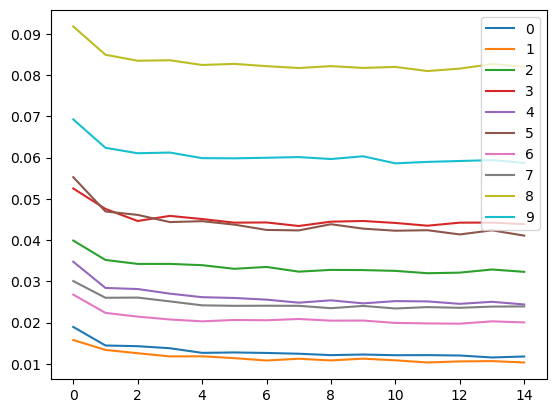

In [12]:
def plot_perceptron_errors(errors_arr):
    digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] #modify to see loss curve for specific digits
    for n in digits:
        plt.plot(list(range(0,len(errors_arr[n]))),errors_arr[n], label=n)
    leg = plt.legend(loc='upper right')
    plt.show()

plot_perceptron_errors(errors_arr)